## Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [1]:
# load the data if you need to; if you have already loaded the data, you may comment this cell out
# -- DO NOT CHANGE THIS CELL -- #
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

--2019-10-12 16:45:49--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.171.45
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.171.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338613624 (323M) [application/zip]
Saving to: ‘/data/train-test-data.zip’

train-test-data.zip 100%[===================>] 322.93M  69.5MB/s    in 4.9s    

2019-10-12 16:45:54 (66.2 MB/s) - ‘/data/train-test-data.zip’ saved [338613624/338613624]

Archive:  /data/train-test-data.zip
   creating: /data/test/
  inflating: /data/test/Abdel_Aziz_Al-Hakim_00.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_01.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_10.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_11.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_40.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_41.jpg  
  inflating: /data/test/Abdullah_Gul_10

  inflating: /data/test/Barry_Alvarez_11.jpg  
  inflating: /data/test/Barry_Alvarez_20.jpg  
  inflating: /data/test/Barry_Alvarez_21.jpg  
  inflating: /data/test/Barry_Alvarez_30.jpg  
  inflating: /data/test/Barry_Alvarez_31.jpg  
  inflating: /data/test/Ben_Kingsley_10.jpg  
  inflating: /data/test/Ben_Kingsley_11.jpg  
  inflating: /data/test/Ben_Kingsley_20.jpg  
  inflating: /data/test/Ben_Kingsley_21.jpg  
  inflating: /data/test/Ben_Kingsley_50.jpg  
  inflating: /data/test/Ben_Kingsley_51.jpg  
  inflating: /data/test/Ben_Stein_10.jpg  
  inflating: /data/test/Ben_Stein_11.jpg  
  inflating: /data/test/Ben_Stein_30.jpg  
  inflating: /data/test/Ben_Stein_31.jpg  
  inflating: /data/test/Ben_Stein_40.jpg  
  inflating: /data/test/Ben_Stein_41.jpg  
  inflating: /data/test/Ben_Stein_50.jpg  
  inflating: /data/test/Ben_Stein_51.jpg  
  inflating: /data/test/Benedita_da_Silva_10.jpg  
  inflating: /data/test/Benedita_da_Silva_11.jpg  
  inflating: /data/test/Benedita_da_Silva_2

  inflating: /data/test/Christopher_Amolsch_51.jpg  
  inflating: /data/test/Christopher_Reeve_10.jpg  
  inflating: /data/test/Christopher_Reeve_11.jpg  
  inflating: /data/test/Christopher_Reeve_20.jpg  
  inflating: /data/test/Christopher_Reeve_21.jpg  
  inflating: /data/test/Christopher_Reeve_40.jpg  
  inflating: /data/test/Christopher_Reeve_41.jpg  
  inflating: /data/test/Christopher_Walken_00.jpg  
  inflating: /data/test/Christopher_Walken_01.jpg  
  inflating: /data/test/Christopher_Walken_20.jpg  
  inflating: /data/test/Christopher_Walken_21.jpg  
  inflating: /data/test/Christopher_Walken_40.jpg  
  inflating: /data/test/Christopher_Walken_41.jpg  
  inflating: /data/test/Christopher_Walken_50.jpg  
  inflating: /data/test/Christopher_Walken_51.jpg  
  inflating: /data/test/Chuck_Hagel_20.jpg  
  inflating: /data/test/Chuck_Hagel_21.jpg  
  inflating: /data/test/Chuck_Hagel_30.jpg  
  inflating: /data/test/Chuck_Hagel_31.jpg  
  inflating: /data/test/Chuck_Hagel_40.jpg  


  inflating: /data/test/Edward_Burns_21.jpg  
  inflating: /data/test/Edward_Burns_30.jpg  
  inflating: /data/test/Edward_Burns_31.jpg  
  inflating: /data/test/Edward_Burns_50.jpg  
  inflating: /data/test/Edward_Burns_51.jpg  
  inflating: /data/test/Edward_Norton_10.jpg  
  inflating: /data/test/Edward_Norton_11.jpg  
  inflating: /data/test/Edward_Norton_30.jpg  
  inflating: /data/test/Edward_Norton_31.jpg  
  inflating: /data/test/Edward_Norton_40.jpg  
  inflating: /data/test/Edward_Norton_41.jpg  
  inflating: /data/test/Edward_Norton_50.jpg  
  inflating: /data/test/Edward_Norton_51.jpg  
  inflating: /data/test/Elaine_Chao_00.jpg  
  inflating: /data/test/Elaine_Chao_01.jpg  
  inflating: /data/test/Elaine_Chao_20.jpg  
  inflating: /data/test/Elaine_Chao_21.jpg  
  inflating: /data/test/Elaine_Chao_50.jpg  
  inflating: /data/test/Elaine_Chao_51.jpg  
  inflating: /data/test/Elaine_Stritch_10.jpg  
  inflating: /data/test/Elaine_Stritch_11.jpg  
  inflating: /data/test/Elai

  inflating: /data/test/Frank_Solich_30.jpg  
  inflating: /data/test/Frank_Solich_31.jpg  
  inflating: /data/test/Franz_Fischler_00.jpg  
  inflating: /data/test/Franz_Fischler_01.jpg  
  inflating: /data/test/Franz_Fischler_30.jpg  
  inflating: /data/test/Franz_Fischler_31.jpg  
  inflating: /data/test/Franz_Fischler_40.jpg  
  inflating: /data/test/Franz_Fischler_41.jpg  
  inflating: /data/test/Franz_Fischler_50.jpg  
  inflating: /data/test/Franz_Fischler_51.jpg  
  inflating: /data/test/Gabi_Zimmer_00.jpg  
  inflating: /data/test/Gabi_Zimmer_01.jpg  
  inflating: /data/test/Gabi_Zimmer_10.jpg  
  inflating: /data/test/Gabi_Zimmer_11.jpg  
  inflating: /data/test/Gabi_Zimmer_20.jpg  
  inflating: /data/test/Gabi_Zimmer_21.jpg  
  inflating: /data/test/Gabi_Zimmer_50.jpg  
  inflating: /data/test/Gabi_Zimmer_51.jpg  
  inflating: /data/test/Gary_Bettman_10.jpg  
  inflating: /data/test/Gary_Bettman_11.jpg  
  inflating: /data/test/Gary_Bettman_30.jpg  
  inflating: /data/test/Ga

  inflating: /data/test/Kate_Capshaw_10.jpg  
  inflating: /data/test/Kate_Capshaw_11.jpg  
  inflating: /data/test/Kate_Capshaw_20.jpg  
  inflating: /data/test/Kate_Capshaw_21.jpg  
  inflating: /data/test/Kate_Capshaw_40.jpg  
  inflating: /data/test/Kate_Capshaw_41.jpg  
  inflating: /data/test/Kate_Winslet_00.jpg  
  inflating: /data/test/Kate_Winslet_01.jpg  
  inflating: /data/test/Kate_Winslet_10.jpg  
  inflating: /data/test/Kate_Winslet_11.jpg  
  inflating: /data/test/Kate_Winslet_50.jpg  
  inflating: /data/test/Kate_Winslet_51.jpg  
  inflating: /data/test/Katharine_Hepburn_10.jpg  
  inflating: /data/test/Katharine_Hepburn_11.jpg  
  inflating: /data/test/Katharine_Hepburn_30.jpg  
  inflating: /data/test/Katharine_Hepburn_31.jpg  
  inflating: /data/test/Katharine_Hepburn_40.jpg  
  inflating: /data/test/Katharine_Hepburn_41.jpg  
  inflating: /data/test/Kathryn_Morris_10.jpg  
  inflating: /data/test/Kathryn_Morris_11.jpg  
  inflating: /data/test/Kathryn_Morris_20.jpg 

  inflating: /data/test/Linda_Dano_21.jpg  
  inflating: /data/test/Linda_Dano_30.jpg  
  inflating: /data/test/Linda_Dano_31.jpg  
  inflating: /data/test/Linda_Dano_50.jpg  
  inflating: /data/test/Linda_Dano_51.jpg  
  inflating: /data/test/Linda_Franklin_00.jpg  
  inflating: /data/test/Linda_Franklin_01.jpg  
  inflating: /data/test/Linda_Franklin_10.jpg  
  inflating: /data/test/Linda_Franklin_11.jpg  
  inflating: /data/test/Linda_Franklin_20.jpg  
  inflating: /data/test/Linda_Franklin_21.jpg  
  inflating: /data/test/Linda_Franklin_40.jpg  
  inflating: /data/test/Linda_Franklin_41.jpg  
  inflating: /data/test/Linda_Sanchez_00.jpg  
  inflating: /data/test/Linda_Sanchez_01.jpg  
  inflating: /data/test/Linda_Sanchez_10.jpg  
  inflating: /data/test/Linda_Sanchez_11.jpg  
  inflating: /data/test/Linda_Sanchez_20.jpg  
  inflating: /data/test/Linda_Sanchez_21.jpg  
  inflating: /data/test/Linda_Sanchez_40.jpg  
  inflating: /data/test/Linda_Sanchez_41.jpg  
  inflating: /data/t

  inflating: /data/test/Mark_Foley_41.jpg  
  inflating: /data/test/Mark_Foley_50.jpg  
  inflating: /data/test/Mark_Foley_51.jpg  
  inflating: /data/test/Mark_Leno_10.jpg  
  inflating: /data/test/Mark_Leno_11.jpg  
  inflating: /data/test/Mark_Leno_20.jpg  
  inflating: /data/test/Mark_Leno_21.jpg  
  inflating: /data/test/Mark_Leno_30.jpg  
  inflating: /data/test/Mark_Leno_31.jpg  
  inflating: /data/test/Martin_Luther_King_III_00.jpg  
  inflating: /data/test/Martin_Luther_King_III_01.jpg  
  inflating: /data/test/Martin_Luther_King_III_30.jpg  
  inflating: /data/test/Martin_Luther_King_III_31.jpg  
  inflating: /data/test/Martin_Luther_King_III_50.jpg  
  inflating: /data/test/Martin_Luther_King_III_51.jpg  
  inflating: /data/test/Martin_Sheen_00.jpg  
  inflating: /data/test/Martin_Sheen_01.jpg  
  inflating: /data/test/Martin_Sheen_30.jpg  
  inflating: /data/test/Martin_Sheen_31.jpg  
  inflating: /data/test/Martin_Sheen_40.jpg  
  inflating: /data/test/Martin_Sheen_41.jpg 

  inflating: /data/test/Picabo_Street_41.jpg  
  inflating: /data/test/Pilar_Montenegro_10.jpg  
  inflating: /data/test/Pilar_Montenegro_11.jpg  
  inflating: /data/test/Pilar_Montenegro_20.jpg  
  inflating: /data/test/Pilar_Montenegro_21.jpg  
  inflating: /data/test/Pilar_Montenegro_50.jpg  
  inflating: /data/test/Pilar_Montenegro_51.jpg  
  inflating: /data/test/Piotr_Anderszewski_20.jpg  
  inflating: /data/test/Piotr_Anderszewski_21.jpg  
  inflating: /data/test/Piotr_Anderszewski_30.jpg  
  inflating: /data/test/Piotr_Anderszewski_31.jpg  
  inflating: /data/test/Piotr_Anderszewski_50.jpg  
  inflating: /data/test/Piotr_Anderszewski_51.jpg  
  inflating: /data/test/Poala_Suarez_30.jpg  
  inflating: /data/test/Poala_Suarez_31.jpg  
  inflating: /data/test/Poala_Suarez_40.jpg  
  inflating: /data/test/Poala_Suarez_41.jpg  
  inflating: /data/test/Poala_Suarez_50.jpg  
  inflating: /data/test/Poala_Suarez_51.jpg  
  inflating: /data/test/Prince_Harry_10.jpg  
  inflating: /data/

  inflating: /data/test/Ted_Turner_51.jpg  
  inflating: /data/test/Teresa_Heinz_Kerry_00.jpg  
  inflating: /data/test/Teresa_Heinz_Kerry_01.jpg  
  inflating: /data/test/Teresa_Heinz_Kerry_10.jpg  
  inflating: /data/test/Teresa_Heinz_Kerry_11.jpg  
  inflating: /data/test/Teresa_Heinz_Kerry_20.jpg  
  inflating: /data/test/Teresa_Heinz_Kerry_21.jpg  
  inflating: /data/test/Terje_Roed-Larsen_00.jpg  
  inflating: /data/test/Terje_Roed-Larsen_01.jpg  
  inflating: /data/test/Terje_Roed-Larsen_20.jpg  
  inflating: /data/test/Terje_Roed-Larsen_21.jpg  
  inflating: /data/test/Terje_Roed-Larsen_30.jpg  
  inflating: /data/test/Terje_Roed-Larsen_31.jpg  
  inflating: /data/test/Tessa_Jowell_00.jpg  
  inflating: /data/test/Tessa_Jowell_01.jpg  
  inflating: /data/test/Tessa_Jowell_20.jpg  
  inflating: /data/test/Tessa_Jowell_21.jpg  
  inflating: /data/test/Tessa_Jowell_30.jpg  
  inflating: /data/test/Tessa_Jowell_31.jpg  
  inflating: /data/test/Tessa_Jowell_50.jpg  
  inflating: /da

  inflating: /data/training/Abdel_Aziz_Al-Hakim_10.jpg  
  inflating: /data/training/Abdel_Aziz_Al-Hakim_11.jpg  
  inflating: /data/training/Abdel_Aziz_Al-Hakim_12.jpg  
  inflating: /data/training/Abdel_Aziz_Al-Hakim_40.jpg  
  inflating: /data/training/Abdel_Aziz_Al-Hakim_41.jpg  
  inflating: /data/training/Abdel_Aziz_Al-Hakim_42.jpg  
  inflating: /data/training/Abdullah_Gul_10.jpg  
  inflating: /data/training/Abdullah_Gul_11.jpg  
  inflating: /data/training/Abdullah_Gul_12.jpg  
  inflating: /data/training/Abdullah_Gul_30.jpg  
  inflating: /data/training/Abdullah_Gul_31.jpg  
  inflating: /data/training/Abdullah_Gul_32.jpg  
  inflating: /data/training/Abdullah_Gul_50.jpg  
  inflating: /data/training/Abdullah_Gul_51.jpg  
  inflating: /data/training/Abdullah_Gul_52.jpg  
  inflating: /data/training/Adam_Sandler_00.jpg  
  inflating: /data/training/Adam_Sandler_01.jpg  
  inflating: /data/training/Adam_Sandler_02.jpg  
  inflating: /data/training/Adam_Sandler_10.jpg  
  inflat

  inflating: /data/training/Amy_Brenneman_30.jpg  
  inflating: /data/training/Amy_Brenneman_31.jpg  
  inflating: /data/training/Amy_Brenneman_32.jpg  
  inflating: /data/training/Amy_Brenneman_50.jpg  
  inflating: /data/training/Amy_Brenneman_51.jpg  
  inflating: /data/training/Amy_Brenneman_52.jpg  
  inflating: /data/training/Andrea_Bocelli_10.jpg  
  inflating: /data/training/Andrea_Bocelli_11.jpg  
  inflating: /data/training/Andrea_Bocelli_12.jpg  
  inflating: /data/training/Andrea_Bocelli_20.jpg  
  inflating: /data/training/Andrea_Bocelli_21.jpg  
  inflating: /data/training/Andrea_Bocelli_22.jpg  
  inflating: /data/training/Andrea_Bocelli_30.jpg  
  inflating: /data/training/Andrea_Bocelli_31.jpg  
  inflating: /data/training/Andrea_Bocelli_32.jpg  
  inflating: /data/training/Andy_Roddick_20.jpg  
  inflating: /data/training/Andy_Roddick_21.jpg  
  inflating: /data/training/Andy_Roddick_22.jpg  
  inflating: /data/training/Andy_Roddick_40.jpg  
  inflating: /data/trainin

  inflating: /data/training/Cameron_Diaz_21.jpg  
  inflating: /data/training/Cameron_Diaz_22.jpg  
  inflating: /data/training/Cameron_Diaz_40.jpg  
  inflating: /data/training/Cameron_Diaz_41.jpg  
  inflating: /data/training/Cameron_Diaz_42.jpg  
  inflating: /data/training/Cameron_Diaz_50.jpg  
  inflating: /data/training/Cameron_Diaz_51.jpg  
  inflating: /data/training/Cameron_Diaz_52.jpg  
  inflating: /data/training/Carey_Lowell_00.jpg  
  inflating: /data/training/Carey_Lowell_01.jpg  
  inflating: /data/training/Carey_Lowell_02.jpg  
  inflating: /data/training/Carey_Lowell_20.jpg  
  inflating: /data/training/Carey_Lowell_21.jpg  
  inflating: /data/training/Carey_Lowell_22.jpg  
  inflating: /data/training/Carey_Lowell_30.jpg  
  inflating: /data/training/Carey_Lowell_31.jpg  
  inflating: /data/training/Carey_Lowell_32.jpg  
  inflating: /data/training/Carla_Gugino_10.jpg  
  inflating: /data/training/Carla_Gugino_11.jpg  
  inflating: /data/training/Carla_Gugino_12.jpg  


  inflating: /data/training/Charlotte_Casiraghi_02.jpg  
  inflating: /data/training/Charlotte_Casiraghi_10.jpg  
  inflating: /data/training/Charlotte_Casiraghi_11.jpg  
  inflating: /data/training/Charlotte_Casiraghi_12.jpg  
  inflating: /data/training/Charlotte_Casiraghi_20.jpg  
  inflating: /data/training/Charlotte_Casiraghi_21.jpg  
  inflating: /data/training/Charlotte_Casiraghi_22.jpg  
  inflating: /data/training/Charlotte_Rampling_00.jpg  
  inflating: /data/training/Charlotte_Rampling_01.jpg  
  inflating: /data/training/Charlotte_Rampling_02.jpg  
  inflating: /data/training/Charlotte_Rampling_30.jpg  
  inflating: /data/training/Charlotte_Rampling_31.jpg  
  inflating: /data/training/Charlotte_Rampling_32.jpg  
  inflating: /data/training/Charlotte_Rampling_40.jpg  
  inflating: /data/training/Charlotte_Rampling_41.jpg  
  inflating: /data/training/Charlotte_Rampling_42.jpg  
  inflating: /data/training/Charlotte_Rampling_50.jpg  
  inflating: /data/training/Charlotte_Ram

  inflating: /data/training/Cindy_Klassen_31.jpg  
  inflating: /data/training/Cindy_Klassen_32.jpg  
  inflating: /data/training/Cindy_Klassen_40.jpg  
  inflating: /data/training/Cindy_Klassen_41.jpg  
  inflating: /data/training/Cindy_Klassen_42.jpg  
  inflating: /data/training/Claire_Danes_30.jpg  
  inflating: /data/training/Claire_Danes_31.jpg  
  inflating: /data/training/Claire_Danes_32.jpg  
  inflating: /data/training/Claire_Danes_40.jpg  
  inflating: /data/training/Claire_Danes_41.jpg  
  inflating: /data/training/Claire_Danes_42.jpg  
  inflating: /data/training/Claire_Danes_50.jpg  
  inflating: /data/training/Claire_Danes_51.jpg  
  inflating: /data/training/Claire_Danes_52.jpg  
  inflating: /data/training/Clark_Randt_10.jpg  
  inflating: /data/training/Clark_Randt_11.jpg  
  inflating: /data/training/Clark_Randt_12.jpg  
  inflating: /data/training/Clark_Randt_20.jpg  
  inflating: /data/training/Clark_Randt_21.jpg  
  inflating: /data/training/Clark_Randt_22.jpg  
 

  inflating: /data/training/Dave_Campo_31.jpg  
  inflating: /data/training/Dave_Campo_32.jpg  
  inflating: /data/training/David_Brent_00.jpg  
  inflating: /data/training/David_Brent_01.jpg  
  inflating: /data/training/David_Brent_02.jpg  
  inflating: /data/training/David_Brent_10.jpg  
  inflating: /data/training/David_Brent_11.jpg  
  inflating: /data/training/David_Brent_12.jpg  
  inflating: /data/training/David_Brent_20.jpg  
  inflating: /data/training/David_Brent_21.jpg  
  inflating: /data/training/David_Brent_22.jpg  
  inflating: /data/training/David_Brent_30.jpg  
  inflating: /data/training/David_Brent_31.jpg  
  inflating: /data/training/David_Brent_32.jpg  
  inflating: /data/training/David_Caruso_00.jpg  
  inflating: /data/training/David_Caruso_01.jpg  
  inflating: /data/training/David_Caruso_02.jpg  
  inflating: /data/training/David_Caruso_10.jpg  
  inflating: /data/training/David_Caruso_11.jpg  
  inflating: /data/training/David_Caruso_12.jpg  
  inflating: /da

  inflating: /data/training/Emmy_Rossum_20.jpg  
  inflating: /data/training/Emmy_Rossum_21.jpg  
  inflating: /data/training/Emmy_Rossum_22.jpg  
  inflating: /data/training/Emmy_Rossum_30.jpg  
  inflating: /data/training/Emmy_Rossum_31.jpg  
  inflating: /data/training/Emmy_Rossum_32.jpg  
  inflating: /data/training/Emmy_Rossum_40.jpg  
  inflating: /data/training/Emmy_Rossum_41.jpg  
  inflating: /data/training/Emmy_Rossum_42.jpg  
  inflating: /data/training/Emmy_Rossum_50.jpg  
  inflating: /data/training/Emmy_Rossum_51.jpg  
  inflating: /data/training/Emmy_Rossum_52.jpg  
  inflating: /data/training/Eric_Benet_00.jpg  
  inflating: /data/training/Eric_Benet_01.jpg  
  inflating: /data/training/Eric_Benet_02.jpg  
  inflating: /data/training/Eric_Benet_10.jpg  
  inflating: /data/training/Eric_Benet_11.jpg  
  inflating: /data/training/Eric_Benet_12.jpg  
  inflating: /data/training/Eric_Benet_30.jpg  
  inflating: /data/training/Eric_Benet_31.jpg  
  inflating: /data/training/

  inflating: /data/training/Gabi_Zimmer_00.jpg  
  inflating: /data/training/Gabi_Zimmer_01.jpg  
  inflating: /data/training/Gabi_Zimmer_02.jpg  
  inflating: /data/training/Gabi_Zimmer_10.jpg  
  inflating: /data/training/Gabi_Zimmer_11.jpg  
  inflating: /data/training/Gabi_Zimmer_12.jpg  
  inflating: /data/training/Gabi_Zimmer_20.jpg  
  inflating: /data/training/Gabi_Zimmer_21.jpg  
  inflating: /data/training/Gabi_Zimmer_22.jpg  
  inflating: /data/training/Gabi_Zimmer_50.jpg  
  inflating: /data/training/Gabi_Zimmer_51.jpg  
  inflating: /data/training/Gabi_Zimmer_52.jpg  
  inflating: /data/training/Gary_Bettman_10.jpg  
  inflating: /data/training/Gary_Bettman_11.jpg  
  inflating: /data/training/Gary_Bettman_12.jpg  
  inflating: /data/training/Gary_Bettman_30.jpg  
  inflating: /data/training/Gary_Bettman_31.jpg  
  inflating: /data/training/Gary_Bettman_32.jpg  
  inflating: /data/training/Gary_Bettman_40.jpg  
  inflating: /data/training/Gary_Bettman_41.jpg  
  inflating:

  inflating: /data/training/James_Cunningham_01.jpg  
  inflating: /data/training/James_Cunningham_02.jpg  
  inflating: /data/training/James_Cunningham_20.jpg  
  inflating: /data/training/James_Cunningham_21.jpg  
  inflating: /data/training/James_Cunningham_22.jpg  
  inflating: /data/training/James_Cunningham_30.jpg  
  inflating: /data/training/James_Cunningham_31.jpg  
  inflating: /data/training/James_Cunningham_32.jpg  
  inflating: /data/training/James_Cunningham_40.jpg  
  inflating: /data/training/James_Cunningham_41.jpg  
  inflating: /data/training/James_Cunningham_42.jpg  
  inflating: /data/training/James_Hoffa_10.jpg  
  inflating: /data/training/James_Hoffa_11.jpg  
  inflating: /data/training/James_Hoffa_12.jpg  
  inflating: /data/training/James_Hoffa_20.jpg  
  inflating: /data/training/James_Hoffa_21.jpg  
  inflating: /data/training/James_Hoffa_22.jpg  
  inflating: /data/training/James_Hoffa_40.jpg  
  inflating: /data/training/James_Hoffa_41.jpg  
  inflating: /

  inflating: /data/training/Katja_Riemann_11.jpg  
  inflating: /data/training/Katja_Riemann_12.jpg  
  inflating: /data/training/Katja_Riemann_20.jpg  
  inflating: /data/training/Katja_Riemann_21.jpg  
  inflating: /data/training/Katja_Riemann_22.jpg  
  inflating: /data/training/Keith_Olbermann_00.jpg  
  inflating: /data/training/Keith_Olbermann_01.jpg  
  inflating: /data/training/Keith_Olbermann_02.jpg  
  inflating: /data/training/Keith_Olbermann_10.jpg  
  inflating: /data/training/Keith_Olbermann_11.jpg  
  inflating: /data/training/Keith_Olbermann_12.jpg  
  inflating: /data/training/Keith_Olbermann_20.jpg  
  inflating: /data/training/Keith_Olbermann_21.jpg  
  inflating: /data/training/Keith_Olbermann_22.jpg  
  inflating: /data/training/Keith_Olbermann_50.jpg  
  inflating: /data/training/Keith_Olbermann_51.jpg  
  inflating: /data/training/Keith_Olbermann_52.jpg  
  inflating: /data/training/Keith_Tyson_00.jpg  
  inflating: /data/training/Keith_Tyson_01.jpg  
  inflating

  inflating: /data/training/Lee_Baca_02.jpg  
  inflating: /data/training/Lee_Baca_10.jpg  
  inflating: /data/training/Lee_Baca_11.jpg  
  inflating: /data/training/Lee_Baca_12.jpg  
  inflating: /data/training/Lee_Baca_40.jpg  
  inflating: /data/training/Lee_Baca_41.jpg  
  inflating: /data/training/Lee_Baca_42.jpg  
  inflating: /data/training/Lene_Espersen_10.jpg  
  inflating: /data/training/Lene_Espersen_11.jpg  
  inflating: /data/training/Lene_Espersen_12.jpg  
  inflating: /data/training/Lene_Espersen_20.jpg  
  inflating: /data/training/Lene_Espersen_21.jpg  
  inflating: /data/training/Lene_Espersen_22.jpg  
  inflating: /data/training/Lene_Espersen_40.jpg  
  inflating: /data/training/Lene_Espersen_41.jpg  
  inflating: /data/training/Lene_Espersen_42.jpg  
  inflating: /data/training/Lesia_Burlak_00.jpg  
  inflating: /data/training/Lesia_Burlak_01.jpg  
  inflating: /data/training/Lesia_Burlak_02.jpg  
  inflating: /data/training/Lesia_Burlak_20.jpg  
  inflating: /data/

  inflating: /data/training/Lucio_Stanca_00.jpg  
  inflating: /data/training/Lucio_Stanca_01.jpg  
  inflating: /data/training/Lucio_Stanca_02.jpg  
  inflating: /data/training/Lucio_Stanca_20.jpg  
  inflating: /data/training/Lucio_Stanca_21.jpg  
  inflating: /data/training/Lucio_Stanca_22.jpg  
  inflating: /data/training/Lucio_Stanca_30.jpg  
  inflating: /data/training/Lucio_Stanca_31.jpg  
  inflating: /data/training/Lucio_Stanca_32.jpg  
  inflating: /data/training/Lucio_Stanca_40.jpg  
  inflating: /data/training/Lucio_Stanca_41.jpg  
  inflating: /data/training/Lucio_Stanca_42.jpg  
  inflating: /data/training/Luis_Ernesto_Derbez_Bautista_00.jpg  
  inflating: /data/training/Luis_Ernesto_Derbez_Bautista_01.jpg  
  inflating: /data/training/Luis_Ernesto_Derbez_Bautista_02.jpg  
  inflating: /data/training/Luis_Ernesto_Derbez_Bautista_10.jpg  
  inflating: /data/training/Luis_Ernesto_Derbez_Bautista_11.jpg  
  inflating: /data/training/Luis_Ernesto_Derbez_Bautista_12.jpg  
  in

  inflating: /data/training/Mark_Foley_41.jpg  
  inflating: /data/training/Mark_Foley_42.jpg  
  inflating: /data/training/Mark_Foley_50.jpg  
  inflating: /data/training/Mark_Foley_51.jpg  
  inflating: /data/training/Mark_Foley_52.jpg  
  inflating: /data/training/Mark_Leno_10.jpg  
  inflating: /data/training/Mark_Leno_11.jpg  
  inflating: /data/training/Mark_Leno_12.jpg  
  inflating: /data/training/Mark_Leno_20.jpg  
  inflating: /data/training/Mark_Leno_21.jpg  
  inflating: /data/training/Mark_Leno_22.jpg  
  inflating: /data/training/Mark_Leno_30.jpg  
  inflating: /data/training/Mark_Leno_31.jpg  
  inflating: /data/training/Mark_Leno_32.jpg  
  inflating: /data/training/Martin_Luther_King_III_00.jpg  
  inflating: /data/training/Martin_Luther_King_III_01.jpg  
  inflating: /data/training/Martin_Luther_King_III_02.jpg  
  inflating: /data/training/Martin_Luther_King_III_30.jpg  
  inflating: /data/training/Martin_Luther_King_III_31.jpg  
  inflating: /data/training/Martin_Lu

  inflating: /data/training/Olivia_Newton-John_12.jpg  
  inflating: /data/training/Olivia_Newton-John_40.jpg  
  inflating: /data/training/Olivia_Newton-John_41.jpg  
  inflating: /data/training/Olivia_Newton-John_42.jpg  
  inflating: /data/training/Orlando_Bloom_00.jpg  
  inflating: /data/training/Orlando_Bloom_01.jpg  
  inflating: /data/training/Orlando_Bloom_02.jpg  
  inflating: /data/training/Orlando_Bloom_30.jpg  
  inflating: /data/training/Orlando_Bloom_31.jpg  
  inflating: /data/training/Orlando_Bloom_32.jpg  
  inflating: /data/training/Orlando_Bloom_40.jpg  
  inflating: /data/training/Orlando_Bloom_41.jpg  
  inflating: /data/training/Orlando_Bloom_42.jpg  
  inflating: /data/training/Orlando_Bloom_50.jpg  
  inflating: /data/training/Orlando_Bloom_51.jpg  
  inflating: /data/training/Orlando_Bloom_52.jpg  
  inflating: /data/training/Otto_Reich_00.jpg  
  inflating: /data/training/Otto_Reich_01.jpg  
  inflating: /data/training/Otto_Reich_02.jpg  
  inflating: /data/t

  inflating: /data/training/Raja_Zafar-ul-Haq_32.jpg  
  inflating: /data/training/Ralph_Klein_00.jpg  
  inflating: /data/training/Ralph_Klein_01.jpg  
  inflating: /data/training/Ralph_Klein_02.jpg  
  inflating: /data/training/Ralph_Klein_10.jpg  
  inflating: /data/training/Ralph_Klein_11.jpg  
  inflating: /data/training/Ralph_Klein_12.jpg  
  inflating: /data/training/Ralph_Klein_30.jpg  
  inflating: /data/training/Ralph_Klein_31.jpg  
  inflating: /data/training/Ralph_Klein_32.jpg  
  inflating: /data/training/Raza_Rabbani_20.jpg  
  inflating: /data/training/Raza_Rabbani_21.jpg  
  inflating: /data/training/Raza_Rabbani_22.jpg  
  inflating: /data/training/Raza_Rabbani_30.jpg  
  inflating: /data/training/Raza_Rabbani_31.jpg  
  inflating: /data/training/Raza_Rabbani_32.jpg  
  inflating: /data/training/Raza_Rabbani_50.jpg  
  inflating: /data/training/Raza_Rabbani_51.jpg  
  inflating: /data/training/Raza_Rabbani_52.jpg  
  inflating: /data/training/Recep_Tayyip_Erdogan_00.jp

  inflating: /data/training/Sasha_Cohen_21.jpg  
  inflating: /data/training/Sasha_Cohen_22.jpg  
  inflating: /data/training/Sasha_Cohen_40.jpg  
  inflating: /data/training/Sasha_Cohen_41.jpg  
  inflating: /data/training/Sasha_Cohen_42.jpg  
  inflating: /data/training/Sasha_Cohen_50.jpg  
  inflating: /data/training/Sasha_Cohen_51.jpg  
  inflating: /data/training/Sasha_Cohen_52.jpg  
  inflating: /data/training/T_Boone_Pickens_10.jpg  
  inflating: /data/training/T_Boone_Pickens_11.jpg  
  inflating: /data/training/T_Boone_Pickens_12.jpg  
  inflating: /data/training/T_Boone_Pickens_20.jpg  
  inflating: /data/training/T_Boone_Pickens_21.jpg  
  inflating: /data/training/T_Boone_Pickens_22.jpg  
  inflating: /data/training/T_Boone_Pickens_30.jpg  
  inflating: /data/training/T_Boone_Pickens_31.jpg  
  inflating: /data/training/T_Boone_Pickens_32.jpg  
  inflating: /data/training/T_Boone_Pickens_50.jpg  
  inflating: /data/training/T_Boone_Pickens_51.jpg  
  inflating: /data/traini

  inflating: /data/training/Vicente_Fox_10.jpg  
  inflating: /data/training/Vicente_Fox_11.jpg  
  inflating: /data/training/Vicente_Fox_12.jpg  
  inflating: /data/training/Vicente_Fox_20.jpg  
  inflating: /data/training/Vicente_Fox_21.jpg  
  inflating: /data/training/Vicente_Fox_22.jpg  
  inflating: /data/training/Vicente_Fox_30.jpg  
  inflating: /data/training/Vicente_Fox_31.jpg  
  inflating: /data/training/Vicente_Fox_32.jpg  
  inflating: /data/training/Vojislav_Seselj_00.jpg  
  inflating: /data/training/Vojislav_Seselj_01.jpg  
  inflating: /data/training/Vojislav_Seselj_02.jpg  
  inflating: /data/training/Vojislav_Seselj_20.jpg  
  inflating: /data/training/Vojislav_Seselj_21.jpg  
  inflating: /data/training/Vojislav_Seselj_22.jpg  
  inflating: /data/training/Vojislav_Seselj_40.jpg  
  inflating: /data/training/Vojislav_Seselj_41.jpg  
  inflating: /data/training/Vojislav_Seselj_42.jpg  
  inflating: /data/training/Vojislav_Seselj_50.jpg  
  inflating: /data/training/V

<div class="alert alert-info">**Note:** Workspaces automatically close connections after 30 minutes of inactivity (including inactivity while training!). Use the code snippet below to keep your workspace alive during training. (The active_session context manager is imported below.)
</div>
```
from workspace_utils import active_session

with active_session():
    train_model(num_epochs)
```


In [2]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# import utilities to keep workspaces alive during model training
from workspace_utils import active_session

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

In [3]:
## TODO: Define the Net in models.py

import torch
import torch.nn as nn
import torch.nn.functional as F

## TODO: Once you've define the network, you can instantiate it
# one example conv layer has been provided for you
from models import Net

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc_drop1): Dropout(p=0.2)
  (conv2): Conv2d(32, 36, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc_drop2): Dropout(p=0.2)
  (conv3): Conv2d(36, 48, kernel_size=(5, 5), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc_drop3): Dropout(p=0.2)
  (conv4): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc_drop4): Dropout(p=0.2)
  (conv5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc6): Linear(in_features=1024, out_features=136, bias=True)
)


## Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [4]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale(250),
                                    RandomCrop(224),
                                    Normalize(),
                                    ToTensor()])

# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

In [5]:
# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='/data/training_frames_keypoints.csv',
                                             root_dir='/data/training/',
                                             transform=data_transform)


print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains. Too large a batch size may cause your model to crash and/or run out of memory while training.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [6]:
# load training data in batches
batch_size = 10

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)


## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [7]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='/data/test_frames_keypoints.csv',
                                             root_dir='/data/test/',
                                             transform=data_transform)



In [8]:
# load test data in batches
batch_size = 10

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)

## Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Wrap the image in a Variable, so that the net can process it as input and track how it changes as the image moves through the network.
3. Make sure the image is a FloatTensor, which the model expects.
4. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [9]:
# test the model on a batch of test images

def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [10]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [11]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

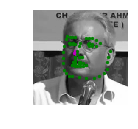

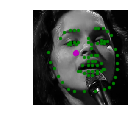

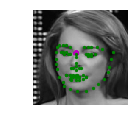

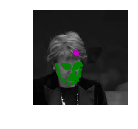

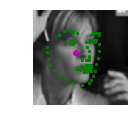

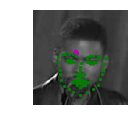

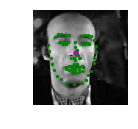

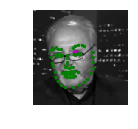

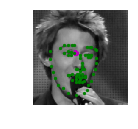

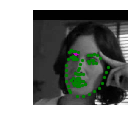

In [12]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's Variable wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [13]:
## TODO: Define the loss and optimization
import torch.optim as optim

criterion = nn.MSELoss()

optimizer = optim.Adam(net.parameters(), lr = 0.0001)


## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [14]:
def train_net(n_epochs):
    
    loss_over_time = [] # to track the loss as the network trains

    # prepare the net for training
    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            running_loss += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                running_loss = 0.0

    print('Finished Training')
    return loss_over_time

In [15]:
# train your network
n_epochs = 30 # start small, and increase when you've decided on your model structure and hyperparams

# this is a Workspaces-specific context manager to keep the connection
# alive while training your model, not part of pytorch
with active_session():
    train_net(n_epochs)

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 1, Batch: 10, Avg. Loss: 0.5369917660951614
Epoch: 1, Batch: 20, Avg. Loss: 0.3860810548067093
Epoch: 1, Batch: 30, Avg. Loss: 0.3625398024916649
Epoch: 1, Batch: 40, Avg. Loss: 0.18422365486621856
Epoch: 1, Batch: 50, Avg. Loss: 0.22027689814567566
Epoch: 1, Batch: 60, Avg. Loss: 0.18212108537554741
Epoch: 1, Batch: 70, Avg. Loss: 0.37002536877989767
Epoch: 1, Batch: 80, Avg. Loss: 0.19306941628456115
Epoch: 1, Batch: 90, Avg. Loss: 0.17231905311346055
Epoch: 1, Batch: 100, Avg. Loss: 0.18942404091358184
Epoch: 1, Batch: 110, Avg. Loss: 0.1890767090022564
Epoch: 1, Batch: 120, Avg. Loss: 0.20939550399780274
Epoch: 1, Batch: 130, Avg. Loss: 0.19059739708900453
Epoch: 1, Batch: 140, Avg. Loss: 0.16351384073495864
Epoch: 1, Batch: 150, Avg. Loss: 0.17003423795104028
Epoch: 1, Batch: 160, Avg. Loss: 0.17789027318358422
Epoch: 1, Batch: 170, Avg. Loss: 0.242016963660717
Epoch: 1, Batch: 180, Avg. Loss: 0.1973896376788616
Epoch: 1, Batch: 190, Avg. Loss: 0.17376443296670913
Epoch: 1,

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 2, Batch: 10, Avg. Loss: 0.18254026398062706
Epoch: 2, Batch: 20, Avg. Loss: 0.17165563628077507
Epoch: 2, Batch: 30, Avg. Loss: 0.1780182495713234
Epoch: 2, Batch: 40, Avg. Loss: 0.19647334590554238
Epoch: 2, Batch: 50, Avg. Loss: 0.16353147029876708
Epoch: 2, Batch: 60, Avg. Loss: 0.15832765251398087
Epoch: 2, Batch: 70, Avg. Loss: 0.18589175045490264
Epoch: 2, Batch: 80, Avg. Loss: 0.19308114871382714
Epoch: 2, Batch: 90, Avg. Loss: 0.1993664436042309
Epoch: 2, Batch: 100, Avg. Loss: 0.23138706013560295
Epoch: 2, Batch: 110, Avg. Loss: 0.1211460441350937
Epoch: 2, Batch: 120, Avg. Loss: 0.17488529309630393
Epoch: 2, Batch: 130, Avg. Loss: 0.22935337126255034
Epoch: 2, Batch: 140, Avg. Loss: 0.20156777799129486
Epoch: 2, Batch: 150, Avg. Loss: 0.20335813686251641
Epoch: 2, Batch: 160, Avg. Loss: 0.17574169263243675
Epoch: 2, Batch: 170, Avg. Loss: 0.20616631358861923
Epoch: 2, Batch: 180, Avg. Loss: 0.20740638971328734
Epoch: 2, Batch: 190, Avg. Loss: 0.1662080004811287
Epoch:

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 3, Batch: 10, Avg. Loss: 0.145814598351717
Epoch: 3, Batch: 20, Avg. Loss: 0.21122472658753394
Epoch: 3, Batch: 30, Avg. Loss: 0.1626902736723423
Epoch: 3, Batch: 40, Avg. Loss: 0.251088535040617
Epoch: 3, Batch: 50, Avg. Loss: 0.14801985621452332
Epoch: 3, Batch: 60, Avg. Loss: 0.15042796060442926
Epoch: 3, Batch: 70, Avg. Loss: 0.16698781102895738
Epoch: 3, Batch: 80, Avg. Loss: 0.14564486145973204
Epoch: 3, Batch: 90, Avg. Loss: 0.14873585477471352
Epoch: 3, Batch: 100, Avg. Loss: 0.1594358753412962
Epoch: 3, Batch: 110, Avg. Loss: 0.1432914949953556
Epoch: 3, Batch: 120, Avg. Loss: 0.13760847076773644
Epoch: 3, Batch: 130, Avg. Loss: 0.1917836919426918
Epoch: 3, Batch: 140, Avg. Loss: 0.13168953955173493
Epoch: 3, Batch: 150, Avg. Loss: 0.16821295991539956
Epoch: 3, Batch: 160, Avg. Loss: 0.14621544256806374
Epoch: 3, Batch: 170, Avg. Loss: 0.18633385002613068
Epoch: 3, Batch: 180, Avg. Loss: 0.12858036458492278
Epoch: 3, Batch: 190, Avg. Loss: 0.1896698921918869
Epoch: 3, B

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 4, Batch: 10, Avg. Loss: 0.18332431018352507
Epoch: 4, Batch: 20, Avg. Loss: 0.17258958369493485
Epoch: 4, Batch: 30, Avg. Loss: 0.14181710183620452
Epoch: 4, Batch: 40, Avg. Loss: 0.15099990591406823
Epoch: 4, Batch: 50, Avg. Loss: 0.11691624373197555
Epoch: 4, Batch: 60, Avg. Loss: 0.12389645874500274
Epoch: 4, Batch: 70, Avg. Loss: 0.26598991379141806
Epoch: 4, Batch: 80, Avg. Loss: 0.1336243584752083
Epoch: 4, Batch: 90, Avg. Loss: 0.1289084069430828
Epoch: 4, Batch: 100, Avg. Loss: 0.12898836508393288
Epoch: 4, Batch: 110, Avg. Loss: 0.1800402533262968
Epoch: 4, Batch: 120, Avg. Loss: 0.16640663966536523
Epoch: 4, Batch: 130, Avg. Loss: 0.17239442691206933
Epoch: 4, Batch: 140, Avg. Loss: 0.16754220202565193
Epoch: 4, Batch: 150, Avg. Loss: 0.14336661398410797
Epoch: 4, Batch: 160, Avg. Loss: 0.16231929063796996
Epoch: 4, Batch: 170, Avg. Loss: 0.1554088108241558
Epoch: 4, Batch: 180, Avg. Loss: 0.14994891211390496
Epoch: 4, Batch: 190, Avg. Loss: 0.13612077087163926
Epoch:

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 5, Batch: 10, Avg. Loss: 0.1341127298772335
Epoch: 5, Batch: 20, Avg. Loss: 0.1385987691581249
Epoch: 5, Batch: 30, Avg. Loss: 0.1285974197089672
Epoch: 5, Batch: 40, Avg. Loss: 0.11029076874256134
Epoch: 5, Batch: 50, Avg. Loss: 0.14642660170793534
Epoch: 5, Batch: 60, Avg. Loss: 0.10273434892296791
Epoch: 5, Batch: 70, Avg. Loss: 0.1362539201974869
Epoch: 5, Batch: 80, Avg. Loss: 0.13471901938319206
Epoch: 5, Batch: 90, Avg. Loss: 0.1128063790500164
Epoch: 5, Batch: 100, Avg. Loss: 0.12891936376690866
Epoch: 5, Batch: 110, Avg. Loss: 0.1407494552433491
Epoch: 5, Batch: 120, Avg. Loss: 0.12969494685530664
Epoch: 5, Batch: 130, Avg. Loss: 0.14329656437039376
Epoch: 5, Batch: 140, Avg. Loss: 0.13424327597022057
Epoch: 5, Batch: 150, Avg. Loss: 0.19712555706501006
Epoch: 5, Batch: 160, Avg. Loss: 0.1421842783689499
Epoch: 5, Batch: 170, Avg. Loss: 0.12317140027880669
Epoch: 5, Batch: 180, Avg. Loss: 0.13200916573405266
Epoch: 5, Batch: 190, Avg. Loss: 0.13217834942042828
Epoch: 5,

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 6, Batch: 10, Avg. Loss: 0.19619068130850792
Epoch: 6, Batch: 20, Avg. Loss: 0.16602666825056075
Epoch: 6, Batch: 30, Avg. Loss: 0.13345437571406366
Epoch: 6, Batch: 40, Avg. Loss: 0.1501708570867777
Epoch: 6, Batch: 50, Avg. Loss: 0.10715937055647373
Epoch: 6, Batch: 60, Avg. Loss: 0.12426805645227432
Epoch: 6, Batch: 70, Avg. Loss: 0.13382812440395356
Epoch: 6, Batch: 80, Avg. Loss: 0.16945168673992156
Epoch: 6, Batch: 90, Avg. Loss: 0.15263264514505864
Epoch: 6, Batch: 100, Avg. Loss: 0.11470661349594594
Epoch: 6, Batch: 110, Avg. Loss: 0.10585159957408904
Epoch: 6, Batch: 120, Avg. Loss: 0.11848862208425999
Epoch: 6, Batch: 130, Avg. Loss: 0.11766731068491935
Epoch: 6, Batch: 140, Avg. Loss: 0.1161576859652996
Epoch: 6, Batch: 150, Avg. Loss: 0.11323099732398986
Epoch: 6, Batch: 160, Avg. Loss: 0.12024551704525947
Epoch: 6, Batch: 170, Avg. Loss: 0.23527958542108535
Epoch: 6, Batch: 180, Avg. Loss: 0.1150360532104969
Epoch: 6, Batch: 190, Avg. Loss: 0.11630420684814453
Epoch

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 7, Batch: 10, Avg. Loss: 0.11869989261031151
Epoch: 7, Batch: 20, Avg. Loss: 0.14403022602200508
Epoch: 7, Batch: 30, Avg. Loss: 0.11624847650527954
Epoch: 7, Batch: 40, Avg. Loss: 0.09758890196681022
Epoch: 7, Batch: 50, Avg. Loss: 0.17084898762404918
Epoch: 7, Batch: 60, Avg. Loss: 0.09954904913902282
Epoch: 7, Batch: 70, Avg. Loss: 0.09406052008271218
Epoch: 7, Batch: 80, Avg. Loss: 0.1437659315764904
Epoch: 7, Batch: 90, Avg. Loss: 0.1189497347921133
Epoch: 7, Batch: 100, Avg. Loss: 0.11760794296860695
Epoch: 7, Batch: 110, Avg. Loss: 0.10412187092006206
Epoch: 7, Batch: 120, Avg. Loss: 0.08777675107121467
Epoch: 7, Batch: 130, Avg. Loss: 0.09821977950632572
Epoch: 7, Batch: 140, Avg. Loss: 0.10714514926075935
Epoch: 7, Batch: 150, Avg. Loss: 0.1474626287817955
Epoch: 7, Batch: 160, Avg. Loss: 0.07472989298403263
Epoch: 7, Batch: 170, Avg. Loss: 0.10780849158763886
Epoch: 7, Batch: 180, Avg. Loss: 0.2670904710888863
Epoch: 7, Batch: 190, Avg. Loss: 0.13625774048268796
Epoch:

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 8, Batch: 10, Avg. Loss: 0.10187637098133565
Epoch: 8, Batch: 20, Avg. Loss: 0.08560165353119373
Epoch: 8, Batch: 30, Avg. Loss: 0.12399654984474182
Epoch: 8, Batch: 40, Avg. Loss: 0.09449615180492402
Epoch: 8, Batch: 50, Avg. Loss: 0.12499719746410846
Epoch: 8, Batch: 60, Avg. Loss: 0.1045447412878275
Epoch: 8, Batch: 70, Avg. Loss: 0.11495296470820904
Epoch: 8, Batch: 80, Avg. Loss: 0.07952650934457779
Epoch: 8, Batch: 90, Avg. Loss: 0.10916991606354713
Epoch: 8, Batch: 100, Avg. Loss: 0.1097099393606186
Epoch: 8, Batch: 110, Avg. Loss: 0.1740616299211979
Epoch: 8, Batch: 120, Avg. Loss: 0.07695737294852734
Epoch: 8, Batch: 130, Avg. Loss: 0.10124637633562088
Epoch: 8, Batch: 140, Avg. Loss: 0.1483090713620186
Epoch: 8, Batch: 150, Avg. Loss: 0.14548774547874926
Epoch: 8, Batch: 160, Avg. Loss: 0.12117563374340534
Epoch: 8, Batch: 170, Avg. Loss: 0.09587544053792954
Epoch: 8, Batch: 180, Avg. Loss: 0.1394251175224781
Epoch: 8, Batch: 190, Avg. Loss: 0.09191711209714412
Epoch: 

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 9, Batch: 10, Avg. Loss: 0.09789442084729671
Epoch: 9, Batch: 20, Avg. Loss: 0.08053744342178107
Epoch: 9, Batch: 30, Avg. Loss: 0.07810376882553101
Epoch: 9, Batch: 40, Avg. Loss: 0.09539886936545372
Epoch: 9, Batch: 50, Avg. Loss: 0.1318579763174057
Epoch: 9, Batch: 60, Avg. Loss: 0.09263969101011753
Epoch: 9, Batch: 70, Avg. Loss: 0.08270324245095254
Epoch: 9, Batch: 80, Avg. Loss: 0.16285267807543277
Epoch: 9, Batch: 90, Avg. Loss: 0.1010706752538681
Epoch: 9, Batch: 100, Avg. Loss: 0.10828830152750016
Epoch: 9, Batch: 110, Avg. Loss: 0.08199985772371292
Epoch: 9, Batch: 120, Avg. Loss: 0.0765447162091732
Epoch: 9, Batch: 130, Avg. Loss: 0.08260308988392354
Epoch: 9, Batch: 140, Avg. Loss: 0.06680247373878956
Epoch: 9, Batch: 150, Avg. Loss: 0.0756869912147522
Epoch: 9, Batch: 160, Avg. Loss: 0.08709940239787102
Epoch: 9, Batch: 170, Avg. Loss: 0.12954976856708528
Epoch: 9, Batch: 180, Avg. Loss: 0.10171869434416295
Epoch: 9, Batch: 190, Avg. Loss: 0.10180887877941132
Epoch:

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 10, Batch: 10, Avg. Loss: 0.09440378583967686
Epoch: 10, Batch: 20, Avg. Loss: 0.13418580926954746
Epoch: 10, Batch: 30, Avg. Loss: 0.14766142442822455
Epoch: 10, Batch: 40, Avg. Loss: 0.08249828927218913
Epoch: 10, Batch: 50, Avg. Loss: 0.13722616024315357
Epoch: 10, Batch: 60, Avg. Loss: 0.07839741632342338
Epoch: 10, Batch: 70, Avg. Loss: 0.0699126698076725
Epoch: 10, Batch: 80, Avg. Loss: 0.07736492305994033
Epoch: 10, Batch: 90, Avg. Loss: 0.08272576443850994
Epoch: 10, Batch: 100, Avg. Loss: 0.08969465382397175
Epoch: 10, Batch: 110, Avg. Loss: 0.09674163907766342
Epoch: 10, Batch: 120, Avg. Loss: 0.08190972320735454
Epoch: 10, Batch: 130, Avg. Loss: 0.10520715862512589
Epoch: 10, Batch: 140, Avg. Loss: 0.07531253546476364
Epoch: 10, Batch: 150, Avg. Loss: 0.1367600243538618
Epoch: 10, Batch: 160, Avg. Loss: 0.11919560469686985
Epoch: 10, Batch: 170, Avg. Loss: 0.09292532876133919
Epoch: 10, Batch: 180, Avg. Loss: 0.14950407035648822
Epoch: 10, Batch: 190, Avg. Loss: 0.084

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 11, Batch: 10, Avg. Loss: 0.07875828258693218
Epoch: 11, Batch: 20, Avg. Loss: 0.09875823967158795
Epoch: 11, Batch: 30, Avg. Loss: 0.06378789730370045
Epoch: 11, Batch: 40, Avg. Loss: 0.12924939021468163
Epoch: 11, Batch: 50, Avg. Loss: 0.07085743583738804
Epoch: 11, Batch: 60, Avg. Loss: 0.07130448147654533
Epoch: 11, Batch: 70, Avg. Loss: 0.08561590313911438
Epoch: 11, Batch: 80, Avg. Loss: 0.0741940725594759
Epoch: 11, Batch: 90, Avg. Loss: 0.07162208296358585
Epoch: 11, Batch: 100, Avg. Loss: 0.06176276430487633
Epoch: 11, Batch: 110, Avg. Loss: 0.07834045253694058
Epoch: 11, Batch: 120, Avg. Loss: 0.09262897819280624
Epoch: 11, Batch: 130, Avg. Loss: 0.1630395345389843
Epoch: 11, Batch: 140, Avg. Loss: 0.1000287689268589
Epoch: 11, Batch: 150, Avg. Loss: 0.100963269546628
Epoch: 11, Batch: 160, Avg. Loss: 0.06764604300260543
Epoch: 11, Batch: 170, Avg. Loss: 0.1024699117988348
Epoch: 11, Batch: 180, Avg. Loss: 0.07088663913309574
Epoch: 11, Batch: 190, Avg. Loss: 0.0618869

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 12, Batch: 10, Avg. Loss: 0.07427216432988644
Epoch: 12, Batch: 20, Avg. Loss: 0.07154564522206783
Epoch: 12, Batch: 30, Avg. Loss: 0.07132581025362014
Epoch: 12, Batch: 40, Avg. Loss: 0.10289774388074875
Epoch: 12, Batch: 50, Avg. Loss: 0.0751762144267559
Epoch: 12, Batch: 60, Avg. Loss: 0.060158928856253624
Epoch: 12, Batch: 70, Avg. Loss: 0.12297238633036614
Epoch: 12, Batch: 80, Avg. Loss: 0.0797282349318266
Epoch: 12, Batch: 90, Avg. Loss: 0.06033611819148064
Epoch: 12, Batch: 100, Avg. Loss: 0.065394813939929
Epoch: 12, Batch: 110, Avg. Loss: 0.09448601119220257
Epoch: 12, Batch: 120, Avg. Loss: 0.06069584637880325
Epoch: 12, Batch: 130, Avg. Loss: 0.061209797486662866
Epoch: 12, Batch: 140, Avg. Loss: 0.08094653263688087
Epoch: 12, Batch: 150, Avg. Loss: 0.07491293102502823
Epoch: 12, Batch: 160, Avg. Loss: 0.07038907036185264
Epoch: 12, Batch: 170, Avg. Loss: 0.08541900739073753
Epoch: 12, Batch: 180, Avg. Loss: 0.07908562421798707
Epoch: 12, Batch: 190, Avg. Loss: 0.086

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 13, Batch: 10, Avg. Loss: 0.0462207542732358
Epoch: 13, Batch: 20, Avg. Loss: 0.07465466633439063
Epoch: 13, Batch: 30, Avg. Loss: 0.05055057480931282
Epoch: 13, Batch: 40, Avg. Loss: 0.11008978113532067
Epoch: 13, Batch: 50, Avg. Loss: 0.06131257824599743
Epoch: 13, Batch: 60, Avg. Loss: 0.08277697078883647
Epoch: 13, Batch: 70, Avg. Loss: 0.063514494150877
Epoch: 13, Batch: 80, Avg. Loss: 0.06594479195773602
Epoch: 13, Batch: 90, Avg. Loss: 0.07737498208880425
Epoch: 13, Batch: 100, Avg. Loss: 0.06520617567002773
Epoch: 13, Batch: 110, Avg. Loss: 0.09190147444605827
Epoch: 13, Batch: 120, Avg. Loss: 0.11333609782159329
Epoch: 13, Batch: 130, Avg. Loss: 0.0545869842171669
Epoch: 13, Batch: 140, Avg. Loss: 0.08119142390787601
Epoch: 13, Batch: 150, Avg. Loss: 0.07229830659925937
Epoch: 13, Batch: 160, Avg. Loss: 0.10852073784917593
Epoch: 13, Batch: 170, Avg. Loss: 0.07151724845170974
Epoch: 13, Batch: 180, Avg. Loss: 0.06140077263116837
Epoch: 13, Batch: 190, Avg. Loss: 0.06894

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 14, Batch: 10, Avg. Loss: 0.10056458488106727
Epoch: 14, Batch: 20, Avg. Loss: 0.10524163991212845
Epoch: 14, Batch: 30, Avg. Loss: 0.09431263282895089
Epoch: 14, Batch: 40, Avg. Loss: 0.06316960677504539
Epoch: 14, Batch: 50, Avg. Loss: 0.05977143496274948
Epoch: 14, Batch: 60, Avg. Loss: 0.06556344740092754
Epoch: 14, Batch: 70, Avg. Loss: 0.05524586457759142
Epoch: 14, Batch: 80, Avg. Loss: 0.08213682435452938
Epoch: 14, Batch: 90, Avg. Loss: 0.11171387806534767
Epoch: 14, Batch: 100, Avg. Loss: 0.05340023599565029
Epoch: 14, Batch: 110, Avg. Loss: 0.07166531682014465
Epoch: 14, Batch: 120, Avg. Loss: 0.05040340591222048
Epoch: 14, Batch: 130, Avg. Loss: 0.07016904260963201
Epoch: 14, Batch: 140, Avg. Loss: 0.07298460192978382
Epoch: 14, Batch: 150, Avg. Loss: 0.05873051043599844
Epoch: 14, Batch: 160, Avg. Loss: 0.05511182174086571
Epoch: 14, Batch: 170, Avg. Loss: 0.06546739265322685
Epoch: 14, Batch: 180, Avg. Loss: 0.05259721353650093
Epoch: 14, Batch: 190, Avg. Loss: 0.1

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 15, Batch: 10, Avg. Loss: 0.05068723261356354
Epoch: 15, Batch: 20, Avg. Loss: 0.0806253096088767
Epoch: 15, Batch: 30, Avg. Loss: 0.055549483932554725
Epoch: 15, Batch: 40, Avg. Loss: 0.07081177551299334
Epoch: 15, Batch: 50, Avg. Loss: 0.056651901081204416
Epoch: 15, Batch: 60, Avg. Loss: 0.05974241439253092
Epoch: 15, Batch: 70, Avg. Loss: 0.05719843208789825
Epoch: 15, Batch: 80, Avg. Loss: 0.20416635908186437
Epoch: 15, Batch: 90, Avg. Loss: 0.05840210933238268
Epoch: 15, Batch: 100, Avg. Loss: 0.06992432735860347
Epoch: 15, Batch: 110, Avg. Loss: 0.050828189589083195
Epoch: 15, Batch: 120, Avg. Loss: 0.05131572037935257
Epoch: 15, Batch: 130, Avg. Loss: 0.06881257146596909
Epoch: 15, Batch: 140, Avg. Loss: 0.059446593001484874
Epoch: 15, Batch: 150, Avg. Loss: 0.06641375608742237
Epoch: 15, Batch: 160, Avg. Loss: 0.061368958279490474
Epoch: 15, Batch: 170, Avg. Loss: 0.07851748932152987
Epoch: 15, Batch: 180, Avg. Loss: 0.164983537979424
Epoch: 15, Batch: 190, Avg. Loss: 0

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 16, Batch: 10, Avg. Loss: 0.07521009482443333
Epoch: 16, Batch: 20, Avg. Loss: 0.050893946550786495
Epoch: 16, Batch: 30, Avg. Loss: 0.09356757290661336
Epoch: 16, Batch: 40, Avg. Loss: 0.05862363874912262
Epoch: 16, Batch: 50, Avg. Loss: 0.04337819069623947
Epoch: 16, Batch: 60, Avg. Loss: 0.047140687331557275
Epoch: 16, Batch: 70, Avg. Loss: 0.07683823816478252
Epoch: 16, Batch: 80, Avg. Loss: 0.057179216481745246
Epoch: 16, Batch: 90, Avg. Loss: 0.05137238670140505
Epoch: 16, Batch: 100, Avg. Loss: 0.06282862313091755
Epoch: 16, Batch: 110, Avg. Loss: 0.05832752231508494
Epoch: 16, Batch: 120, Avg. Loss: 0.053459624946117404
Epoch: 16, Batch: 130, Avg. Loss: 0.260533594712615
Epoch: 16, Batch: 140, Avg. Loss: 0.10955635756254196
Epoch: 16, Batch: 150, Avg. Loss: 0.09363951161503792
Epoch: 16, Batch: 160, Avg. Loss: 0.07192006818950177
Epoch: 16, Batch: 170, Avg. Loss: 0.07084017805755138
Epoch: 16, Batch: 180, Avg. Loss: 0.06401932872831821
Epoch: 16, Batch: 190, Avg. Loss: 0

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 17, Batch: 10, Avg. Loss: 0.05670691579580307
Epoch: 17, Batch: 20, Avg. Loss: 0.06391968317329884
Epoch: 17, Batch: 30, Avg. Loss: 0.05926372855901718
Epoch: 17, Batch: 40, Avg. Loss: 0.06018189750611782
Epoch: 17, Batch: 60, Avg. Loss: 0.05069854985922575
Epoch: 17, Batch: 70, Avg. Loss: 0.05429960675537586
Epoch: 17, Batch: 80, Avg. Loss: 0.07656287960708141
Epoch: 17, Batch: 90, Avg. Loss: 0.057827455922961235
Epoch: 17, Batch: 100, Avg. Loss: 0.054078150726854804
Epoch: 17, Batch: 110, Avg. Loss: 0.05150163657963276
Epoch: 17, Batch: 120, Avg. Loss: 0.08568657748401165
Epoch: 17, Batch: 130, Avg. Loss: 0.06861983761191368
Epoch: 17, Batch: 140, Avg. Loss: 0.07373598795384169
Epoch: 17, Batch: 150, Avg. Loss: 0.06769877802580596
Epoch: 17, Batch: 160, Avg. Loss: 0.09130613952875137
Epoch: 17, Batch: 170, Avg. Loss: 0.061491001024842264
Epoch: 17, Batch: 180, Avg. Loss: 0.048706230521202085
Epoch: 17, Batch: 190, Avg. Loss: 0.06987421587109566
Epoch: 17, Batch: 200, Avg. Loss

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 18, Batch: 10, Avg. Loss: 0.05239573922008276
Epoch: 18, Batch: 20, Avg. Loss: 0.11620813682675361
Epoch: 18, Batch: 30, Avg. Loss: 0.0690165963023901
Epoch: 18, Batch: 40, Avg. Loss: 0.054908277839422225
Epoch: 18, Batch: 50, Avg. Loss: 0.04558312110602856
Epoch: 18, Batch: 60, Avg. Loss: 0.0752220842987299
Epoch: 18, Batch: 70, Avg. Loss: 0.15571105070412158
Epoch: 18, Batch: 80, Avg. Loss: 0.052432714588940145
Epoch: 18, Batch: 90, Avg. Loss: 0.04160793982446194
Epoch: 18, Batch: 100, Avg. Loss: 0.05496993064880371
Epoch: 18, Batch: 110, Avg. Loss: 0.04404160510748625
Epoch: 18, Batch: 120, Avg. Loss: 0.051925627328455445
Epoch: 18, Batch: 130, Avg. Loss: 0.053818491846323015
Epoch: 18, Batch: 140, Avg. Loss: 0.11347852237522602
Epoch: 18, Batch: 150, Avg. Loss: 0.058387115225195886
Epoch: 18, Batch: 160, Avg. Loss: 0.04426652565598488
Epoch: 18, Batch: 170, Avg. Loss: 0.07935232035815716
Epoch: 18, Batch: 180, Avg. Loss: 0.06223270148038864
Epoch: 18, Batch: 190, Avg. Loss: 

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 19, Batch: 10, Avg. Loss: 0.12054807785898447
Epoch: 19, Batch: 20, Avg. Loss: 0.07188677731901408
Epoch: 19, Batch: 30, Avg. Loss: 0.04499389305710792
Epoch: 19, Batch: 40, Avg. Loss: 0.09159024152904749
Epoch: 19, Batch: 50, Avg. Loss: 0.04644443187862635
Epoch: 19, Batch: 60, Avg. Loss: 0.0802829721942544
Epoch: 19, Batch: 70, Avg. Loss: 0.0532320873811841
Epoch: 19, Batch: 80, Avg. Loss: 0.05150788296014071
Epoch: 19, Batch: 90, Avg. Loss: 0.04674366507679224
Epoch: 19, Batch: 100, Avg. Loss: 0.04632980916649103
Epoch: 19, Batch: 110, Avg. Loss: 0.0548142783343792
Epoch: 19, Batch: 120, Avg. Loss: 0.085764329880476
Epoch: 19, Batch: 130, Avg. Loss: 0.04226262308657169
Epoch: 19, Batch: 140, Avg. Loss: 0.05499765146523714
Epoch: 19, Batch: 150, Avg. Loss: 0.04075011126697063
Epoch: 19, Batch: 160, Avg. Loss: 0.08696050476282835
Epoch: 19, Batch: 170, Avg. Loss: 0.06568206306546927
Epoch: 19, Batch: 180, Avg. Loss: 0.07141652517020702
Epoch: 19, Batch: 190, Avg. Loss: 0.062251

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 20, Batch: 10, Avg. Loss: 0.037373625487089154
Epoch: 20, Batch: 20, Avg. Loss: 0.043140671029686925
Epoch: 20, Batch: 30, Avg. Loss: 0.053819143772125246
Epoch: 20, Batch: 40, Avg. Loss: 0.08260843344032764
Epoch: 20, Batch: 50, Avg. Loss: 0.07986879758536816
Epoch: 20, Batch: 60, Avg. Loss: 0.04087099190801382
Epoch: 20, Batch: 70, Avg. Loss: 0.07019219119101763
Epoch: 20, Batch: 80, Avg. Loss: 0.04886933621019125
Epoch: 20, Batch: 90, Avg. Loss: 0.08597000483423471
Epoch: 20, Batch: 100, Avg. Loss: 0.05641561038792133
Epoch: 20, Batch: 110, Avg. Loss: 0.043526454083621505
Epoch: 20, Batch: 120, Avg. Loss: 0.04582726992666721
Epoch: 20, Batch: 130, Avg. Loss: 0.04473825953900814
Epoch: 20, Batch: 140, Avg. Loss: 0.043730882741510865
Epoch: 20, Batch: 150, Avg. Loss: 0.0399142649024725
Epoch: 20, Batch: 160, Avg. Loss: 0.12051425594836473
Epoch: 20, Batch: 170, Avg. Loss: 0.048844600841403005
Epoch: 20, Batch: 180, Avg. Loss: 0.055289150960743425
Epoch: 20, Batch: 190, Avg. Los

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 21, Batch: 10, Avg. Loss: 0.05160369407385588
Epoch: 21, Batch: 20, Avg. Loss: 0.05631094761192799
Epoch: 21, Batch: 30, Avg. Loss: 0.08676935844123364
Epoch: 21, Batch: 40, Avg. Loss: 0.09966565314680338
Epoch: 21, Batch: 50, Avg. Loss: 0.05567111596465111
Epoch: 21, Batch: 60, Avg. Loss: 0.04598262868821621
Epoch: 21, Batch: 70, Avg. Loss: 0.040010860003530976
Epoch: 21, Batch: 80, Avg. Loss: 0.05359169915318489
Epoch: 21, Batch: 90, Avg. Loss: 0.03659484852105379
Epoch: 21, Batch: 100, Avg. Loss: 0.05817687995731831
Epoch: 21, Batch: 110, Avg. Loss: 0.0415639765560627
Epoch: 21, Batch: 120, Avg. Loss: 0.04911722429096699
Epoch: 21, Batch: 130, Avg. Loss: 0.05644092969596386
Epoch: 21, Batch: 140, Avg. Loss: 0.05167275574058294
Epoch: 21, Batch: 150, Avg. Loss: 0.15330624338239432
Epoch: 21, Batch: 160, Avg. Loss: 0.1382904877886176
Epoch: 21, Batch: 170, Avg. Loss: 0.08773706071078777
Epoch: 21, Batch: 180, Avg. Loss: 0.04132486339658499
Epoch: 21, Batch: 190, Avg. Loss: 0.04

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 22, Batch: 10, Avg. Loss: 0.046124667301774024
Epoch: 22, Batch: 20, Avg. Loss: 0.04882232714444399
Epoch: 22, Batch: 30, Avg. Loss: 0.04850965216755867
Epoch: 22, Batch: 40, Avg. Loss: 0.039771346002817155
Epoch: 22, Batch: 50, Avg. Loss: 0.04101923294365406
Epoch: 22, Batch: 60, Avg. Loss: 0.0455629026517272
Epoch: 22, Batch: 70, Avg. Loss: 0.0542725969105959
Epoch: 22, Batch: 80, Avg. Loss: 0.09519437849521636
Epoch: 22, Batch: 90, Avg. Loss: 0.05497147180140018
Epoch: 22, Batch: 100, Avg. Loss: 0.060994319058954714
Epoch: 22, Batch: 110, Avg. Loss: 0.27335506603121756
Epoch: 22, Batch: 120, Avg. Loss: 0.039304744079709054
Epoch: 22, Batch: 130, Avg. Loss: 0.05982426702976227
Epoch: 22, Batch: 140, Avg. Loss: 0.04412016570568085
Epoch: 22, Batch: 150, Avg. Loss: 0.03887543566524983
Epoch: 22, Batch: 160, Avg. Loss: 0.043041461147367954
Epoch: 22, Batch: 170, Avg. Loss: 0.049636335112154484
Epoch: 22, Batch: 180, Avg. Loss: 0.050424796715378764
Epoch: 22, Batch: 190, Avg. Loss

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 23, Batch: 10, Avg. Loss: 0.06379267573356628
Epoch: 23, Batch: 20, Avg. Loss: 0.047378997318446636
Epoch: 23, Batch: 30, Avg. Loss: 0.08096262831240893
Epoch: 23, Batch: 40, Avg. Loss: 0.050460108742117885
Epoch: 23, Batch: 50, Avg. Loss: 0.0382049823179841
Epoch: 23, Batch: 60, Avg. Loss: 0.03597187791019678
Epoch: 23, Batch: 70, Avg. Loss: 0.03628010358661413
Epoch: 23, Batch: 80, Avg. Loss: 0.04997329004108906
Epoch: 23, Batch: 90, Avg. Loss: 0.05405136663466692
Epoch: 23, Batch: 100, Avg. Loss: 0.04710649587213993
Epoch: 23, Batch: 110, Avg. Loss: 0.18886965047568083
Epoch: 23, Batch: 120, Avg. Loss: 0.05851141810417175
Epoch: 23, Batch: 130, Avg. Loss: 0.05800730399787426
Epoch: 23, Batch: 140, Avg. Loss: 0.043453325517475605
Epoch: 23, Batch: 150, Avg. Loss: 0.06414272598922252
Epoch: 23, Batch: 160, Avg. Loss: 0.049085813388228414
Epoch: 23, Batch: 170, Avg. Loss: 0.058672326058149336
Epoch: 23, Batch: 180, Avg. Loss: 0.06652753017842769
Epoch: 23, Batch: 190, Avg. Loss:

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 24, Batch: 10, Avg. Loss: 0.03697983101010323
Epoch: 24, Batch: 20, Avg. Loss: 0.04703116752207279
Epoch: 24, Batch: 30, Avg. Loss: 0.052688675187528136
Epoch: 24, Batch: 40, Avg. Loss: 0.05002346523106098
Epoch: 24, Batch: 50, Avg. Loss: 0.055794660840183495
Epoch: 24, Batch: 60, Avg. Loss: 0.04634088538587093
Epoch: 24, Batch: 70, Avg. Loss: 0.05096971858292818
Epoch: 24, Batch: 80, Avg. Loss: 0.05864532459527254
Epoch: 24, Batch: 90, Avg. Loss: 0.1590860581025481
Epoch: 24, Batch: 100, Avg. Loss: 0.03994145058095455
Epoch: 24, Batch: 110, Avg. Loss: 0.04340266175568104
Epoch: 24, Batch: 120, Avg. Loss: 0.06578865833580494
Epoch: 24, Batch: 130, Avg. Loss: 0.04742636177688837
Epoch: 24, Batch: 140, Avg. Loss: 0.05179284308105707
Epoch: 24, Batch: 150, Avg. Loss: 0.047296333312988284
Epoch: 24, Batch: 160, Avg. Loss: 0.058627483807504176
Epoch: 24, Batch: 170, Avg. Loss: 0.052805791795253756
Epoch: 24, Batch: 180, Avg. Loss: 0.17351208478212357
Epoch: 24, Batch: 190, Avg. Loss:

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 25, Batch: 10, Avg. Loss: 0.04189122449606657
Epoch: 25, Batch: 20, Avg. Loss: 0.11345967259258032
Epoch: 25, Batch: 30, Avg. Loss: 0.056161404214799406
Epoch: 25, Batch: 40, Avg. Loss: 0.10720098149031401
Epoch: 25, Batch: 50, Avg. Loss: 0.04255166575312615
Epoch: 25, Batch: 60, Avg. Loss: 0.04548924071714282
Epoch: 25, Batch: 70, Avg. Loss: 0.0429577924311161
Epoch: 25, Batch: 80, Avg. Loss: 0.06426180917769671
Epoch: 25, Batch: 90, Avg. Loss: 0.05421859659254551
Epoch: 25, Batch: 100, Avg. Loss: 0.05626112837344408
Epoch: 25, Batch: 110, Avg. Loss: 0.04027746748179197
Epoch: 25, Batch: 120, Avg. Loss: 0.036974056623876095
Epoch: 25, Batch: 130, Avg. Loss: 0.04402262847870588
Epoch: 25, Batch: 140, Avg. Loss: 0.046201149374246596
Epoch: 25, Batch: 150, Avg. Loss: 0.036990462243556975
Epoch: 25, Batch: 160, Avg. Loss: 0.05950312316417694
Epoch: 25, Batch: 170, Avg. Loss: 0.03417331371456385
Epoch: 25, Batch: 180, Avg. Loss: 0.051932589150965214
Epoch: 25, Batch: 190, Avg. Loss:

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 26, Batch: 10, Avg. Loss: 0.04634068943560123
Epoch: 26, Batch: 20, Avg. Loss: 0.059728842414915564
Epoch: 26, Batch: 30, Avg. Loss: 0.04221508130431175
Epoch: 26, Batch: 40, Avg. Loss: 0.04866543598473072
Epoch: 26, Batch: 50, Avg. Loss: 0.04281770437955856
Epoch: 26, Batch: 60, Avg. Loss: 0.03693510107696056
Epoch: 26, Batch: 70, Avg. Loss: 0.04475651178508997
Epoch: 26, Batch: 80, Avg. Loss: 0.061597471311688426
Epoch: 26, Batch: 90, Avg. Loss: 0.07208654135465623
Epoch: 26, Batch: 100, Avg. Loss: 0.06039915103465319
Epoch: 26, Batch: 110, Avg. Loss: 0.06118563860654831
Epoch: 26, Batch: 120, Avg. Loss: 0.046923814341425896
Epoch: 26, Batch: 130, Avg. Loss: 0.06539246086031199
Epoch: 26, Batch: 140, Avg. Loss: 0.053665700182318685
Epoch: 26, Batch: 150, Avg. Loss: 0.03051015958189964
Epoch: 26, Batch: 160, Avg. Loss: 0.10921645238995552
Epoch: 26, Batch: 170, Avg. Loss: 0.05638465844094753
Epoch: 26, Batch: 180, Avg. Loss: 0.10162329021841288
Epoch: 26, Batch: 190, Avg. Loss:

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 27, Batch: 10, Avg. Loss: 0.05974928010255098
Epoch: 27, Batch: 20, Avg. Loss: 0.03867715802043677
Epoch: 27, Batch: 30, Avg. Loss: 0.034131362475454806
Epoch: 27, Batch: 40, Avg. Loss: 0.05103306369856
Epoch: 27, Batch: 50, Avg. Loss: 0.08029555287212134
Epoch: 27, Batch: 60, Avg. Loss: 0.031217656657099725
Epoch: 27, Batch: 70, Avg. Loss: 0.05216061994433403
Epoch: 27, Batch: 80, Avg. Loss: 0.06678454875946045
Epoch: 27, Batch: 90, Avg. Loss: 0.055306211765855554
Epoch: 27, Batch: 100, Avg. Loss: 0.039883768744766714
Epoch: 27, Batch: 110, Avg. Loss: 0.05849239714443684
Epoch: 27, Batch: 120, Avg. Loss: 0.03264921829104424
Epoch: 27, Batch: 130, Avg. Loss: 0.05637674778699875
Epoch: 27, Batch: 140, Avg. Loss: 0.06570411697030068
Epoch: 27, Batch: 150, Avg. Loss: 0.03179337335750461
Epoch: 27, Batch: 160, Avg. Loss: 0.04667380377650261
Epoch: 27, Batch: 170, Avg. Loss: 0.0406341414898634
Epoch: 27, Batch: 180, Avg. Loss: 0.039107613265514374
Epoch: 27, Batch: 190, Avg. Loss: 0.

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 28, Batch: 10, Avg. Loss: 0.03779376149177551
Epoch: 28, Batch: 20, Avg. Loss: 0.03532364722341299
Epoch: 28, Batch: 30, Avg. Loss: 0.041879871115088466
Epoch: 28, Batch: 40, Avg. Loss: 0.047401670925319196
Epoch: 28, Batch: 50, Avg. Loss: 0.04466129615902901
Epoch: 28, Batch: 60, Avg. Loss: 0.11343866419047118
Epoch: 28, Batch: 70, Avg. Loss: 0.044963414408266546
Epoch: 28, Batch: 80, Avg. Loss: 0.054635534062981606
Epoch: 28, Batch: 90, Avg. Loss: 0.11623071990907193
Epoch: 28, Batch: 100, Avg. Loss: 0.028112779557704925
Epoch: 28, Batch: 110, Avg. Loss: 0.038612977415323255
Epoch: 28, Batch: 120, Avg. Loss: 0.03427330162376165
Epoch: 28, Batch: 130, Avg. Loss: 0.05202029440551996
Epoch: 28, Batch: 140, Avg. Loss: 0.031905004754662514
Epoch: 28, Batch: 150, Avg. Loss: 0.037192460335791114
Epoch: 28, Batch: 160, Avg. Loss: 0.0921181958168745
Epoch: 28, Batch: 170, Avg. Loss: 0.0480740936473012
Epoch: 28, Batch: 180, Avg. Loss: 0.05303109604865312
Epoch: 28, Batch: 190, Avg. Los

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 29, Batch: 10, Avg. Loss: 0.06267791837453843
Epoch: 29, Batch: 20, Avg. Loss: 0.15776018425822258
Epoch: 29, Batch: 30, Avg. Loss: 0.04251413717865944
Epoch: 29, Batch: 40, Avg. Loss: 0.0375274883583188
Epoch: 29, Batch: 50, Avg. Loss: 0.048868363723158836
Epoch: 29, Batch: 60, Avg. Loss: 0.04334055762737989
Epoch: 29, Batch: 70, Avg. Loss: 0.03786179944872856
Epoch: 29, Batch: 80, Avg. Loss: 0.043738069012761116
Epoch: 29, Batch: 90, Avg. Loss: 0.057044272497296336
Epoch: 29, Batch: 100, Avg. Loss: 0.06014742273837328
Epoch: 29, Batch: 110, Avg. Loss: 0.03493393324315548
Epoch: 29, Batch: 120, Avg. Loss: 0.03141727931797504
Epoch: 29, Batch: 130, Avg. Loss: 0.028105885721743107
Epoch: 29, Batch: 140, Avg. Loss: 0.03489563474431634
Epoch: 29, Batch: 150, Avg. Loss: 0.03257593773305416
Epoch: 29, Batch: 160, Avg. Loss: 0.05190655644983053
Epoch: 29, Batch: 170, Avg. Loss: 0.043018595315515995
Epoch: 29, Batch: 180, Avg. Loss: 0.035101092606782916
Epoch: 29, Batch: 190, Avg. Loss

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 30, Batch: 10, Avg. Loss: 0.09315913449972868
Epoch: 30, Batch: 20, Avg. Loss: 0.026879351027309893
Epoch: 30, Batch: 30, Avg. Loss: 0.05857659932225943
Epoch: 30, Batch: 40, Avg. Loss: 0.03506298214197159
Epoch: 30, Batch: 50, Avg. Loss: 0.03156143482774496
Epoch: 30, Batch: 60, Avg. Loss: 0.03668365646153689
Epoch: 30, Batch: 70, Avg. Loss: 0.0423982473090291
Epoch: 30, Batch: 80, Avg. Loss: 0.10707750879228115
Epoch: 30, Batch: 90, Avg. Loss: 0.05669367797672749
Epoch: 30, Batch: 100, Avg. Loss: 0.04057366978377104
Epoch: 30, Batch: 110, Avg. Loss: 0.07233208231627941
Epoch: 30, Batch: 120, Avg. Loss: 0.041654165089130404
Epoch: 30, Batch: 130, Avg. Loss: 0.09924516240134836
Epoch: 30, Batch: 140, Avg. Loss: 0.04758607838302851
Epoch: 30, Batch: 150, Avg. Loss: 0.06538474876433611
Epoch: 30, Batch: 160, Avg. Loss: 0.040925944410264495
Epoch: 30, Batch: 170, Avg. Loss: 0.04709896147251129
Epoch: 30, Batch: 180, Avg. Loss: 0.03649680893868208
Epoch: 30, Batch: 190, Avg. Loss: 0

## Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [16]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


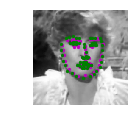

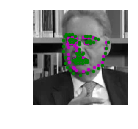

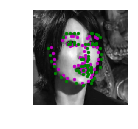

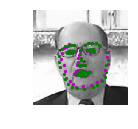

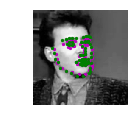

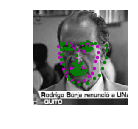

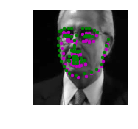

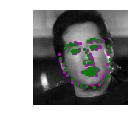

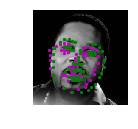

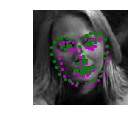

In [17]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

visualize_output(test_images, test_outputs, gt_pts)


Once you've found a good model (or two), save your model so you can load it and use it later!

Save your models but please **delete any checkpoints and saved models before you submit your project** otherwise your workspace may be too large to submit.

In [18]:
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'keypoints_model_1.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**: 

  I started with only two convolutional layers but increased the number of convolutional layers to five. To prevent overfitting the data, I added maxPooling after each convolutional layer and dropout layer with 20% dropout rate after the first four conv. layers.

  I chose **MSEloss** which measure the mean squared error (squared L2 norm) between each element in the input and target because it is a good measure of the Euclidean distance between points. If the MSE would be 0 it would mean that the model was trained perfecly with 0 error.
  
I opted for **Adam optimisation** method as it was mentioned in the referenced paper. I set the hyperparameter learning rate (lr) to 0.0001: it is 10 times slower learning rate than default of 0.001; and the others to default values.

### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**: 

I started with a basic architecture with only two convolutional layers but increased the number of convolutional layers to five. To prevent overfitting the data, I added maxPooling after each convolutional layer and dropout layer with 20% dropout rate after the first four conv. layers.

### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**:

I started testing my architecture with small number of epochs e.g. 1 or 5 and the default batch size of 10. After finding a good architecture I run the model in 30 epochs and batch size 10. As the results were satisfactory, I run the optimization in 15 epochs and using the batch size of 20.

## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

[[ 0.01959764 -0.03422438 -0.07674434 -0.04049142 -0.15274519]
 [-0.10863382  0.05976049 -0.0255484  -0.01487105  0.10329093]
 [-0.17247283  0.10131419  0.1756852  -0.1870909   0.14421536]
 [-0.07251019  0.16281481 -0.06297833 -0.00324896  0.15906127]
 [-0.0680932  -0.09515241 -0.04064824  0.17043236  0.11739366]]
(5, 5)


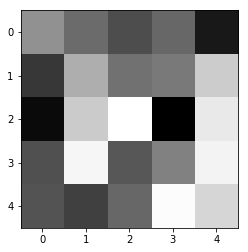

In [19]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 0

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')


## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

(224, 224)


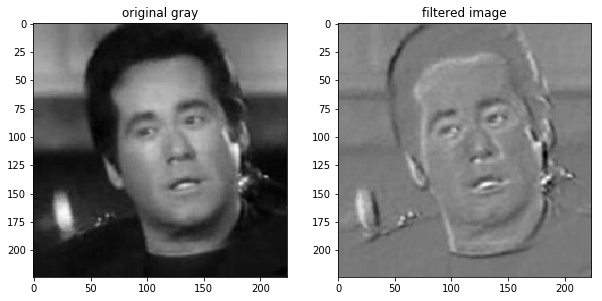

In [23]:
##TODO: load in and display any image from the transformed test dataset

## TODO: Using cv's filter2D function,
## apply a specific set of filter weights (like the one displayed above) to the test image

import cv2
#import numpy as np

%matplotlib inline
imgNo= 7
myImage = np.squeeze(test_images[imgNo].data)
myImage = myImage.numpy()  
print(myImage.shape)
## TODO: Using cv's filter2D function,
## apply a specific set of filter weights (like the one displayed above) to the test image
myFilter=w[filter_index][0]
filtered_image = cv2.filter2D(myImage, -1, myFilter)

#plt.imshow(filtered_image, cmap='gray')


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('original gray')
ax1.imshow(myImage, cmap='gray')

ax2.set_title('filtered image')
ax2.imshow(filtered_image, cmap='gray')

### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**: 

By comparing how the original image and the filtered image look: the filtered image is less sharp with less sharp edges, 
<br>I concluded that the filter has the blurring (smoothing) effect.

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!